# Python and R

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [5]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
4519,64342,118331,4342,2008,2008_House-G_OH-15,OH-15,House-G,House-G,SurveyUSA,325,IVR,NaN,10/26/08,632.0,Mary Jo Kilroy,13948,DEM,47.0,Steve Stivers,13949,REP,41.0,2.00,6.0,11/4/08,45.94,45.18,0.76,5.24,1.0,for WCMH-TV Columbus
5935,14374,18847,7466,2012,2012_Pres-R_GA,GA,Pres-P,Pres-R,Mason-Dixon Polling & Strategy,197,Live Phone,NaN,3/1/12,625.0,Newt Gingrich,3,REP,38.0,Mitt Romney,9,REP,24.0,22.00,14.0,3/6/12,47.19,25.91,21.27,NaN,1.0,for Atlanta Journal-Constitution
8031,47087,73700,71,2016,2016_Sen-G_WI,WI,Sen-G,Sen-G,Public Policy Polling,263,IVR,D,10/19/16,804.0,Russ Feingold,8971,DEM,47.0,Ron Johnson,8972,REP,41.0,NaN,6.0,11/8/16,46.81,50.17,-3.36,9.36,0.0,for unspecified Democratic sponsor
3770,2352,2929,7406,2008,2008_Pres-D_TX,TX,Pres-P,Pres-D,Zogby Interactive/JZ Analytics,395,Live Phone,NaN,3/2/08,855.0,Hillary Rodham Clinton,45,DEM,47.0,Barack Obama,41,DEM,44.0,NaN,3.0,3/4/08,50.88,47.39,3.49,NaN,1.0,NaN
5747,51764,81852,4605,2010,2010_House-G_IL-17,IL-17,House-G,House-G,We Ask America,376,IVR,NaN,10/31/10,1103.0,Philip G. Hare,10790,DEM,43.7,Robert Schilling,10789,REP,51.7,4.49,-8.0,11/2/10,42.96,52.58,-9.62,1.62,1.0,NaN


The cell below loads the same data in R:

In [6]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [7]:
#get rid of the rows with samplesize below 600
df_600 = df[df['samplesize'] >= 600]


In [8]:
%%R -i df_600




NULL


In [9]:

# Siena College/The New York Times Upshot

filter = df_600.pollster == 'Siena College/The New York Times Upshot'
Sena_NYT = df_600[filter]['bias'].mean()
Sena_NYT


4.526410256410257

👉 **Jayhawk Consulting**

In [10]:
filter_2 = df_600.pollster == 'Jayhawk Consulting Services'
Jayhawk = df_600[filter_2]['bias'].mean()

Jayhawk

32.29

👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [11]:

filter_3 = df_600.pollster == 'Fox News/Beacon Research/Shaw & Co. Research'
Fox = df_600[filter_3]['bias'].mean()
Fox

3.073225806451613

👉 **Brown University**

In [12]:

filter_4 = df_600.pollster == 'Brown University'
Brown = df_600[filter_4]['bias'].mean()
Brown

6.63

👉 **American Research Group**

In [13]:

filter_5 = df_600.pollster == 'American Research Group'
American = df_600[filter_5]['bias'].mean()
American

0.11116883116883129

In [14]:
ranking = pd.DataFrame({'pollster': ['Siena College/The New York Times Upshot', 'Jayhawk Consulting', 'Fox News/Beacon Research/Shaw & Co. Research', 'Brown University', 'American Research Group'], 'bias': [Sena_NYT, Jayhawk, Fox, Brown, American]})
ranking

# American Research Group is the pollster with the least bias among all five pollsters, because it has the lowest average bias from all the polls it has conducted.

,pollster,bias
0,Siena College/The New York Times Upshot,4.526410
1,Jayhawk Consulting,32.290000
2,Fox News/Beacon Research/Shaw & Co. Research,3.073226
3,Brown University,6.630000
4,American Research Group,0.111169


### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

In [15]:
# Emerson College is the pollster with the least bias among all five pollsters, and we believe that it is the most reliable pollster among the five. We filtered out the polls that had a sample size below 600, because we believe that the sample size is a good indicator of the reliability of the poll.

# We only calculated the absolute of the average bias for the polls, becasue the democratic-leaning bias republican-leaning bias should be treated equally and 


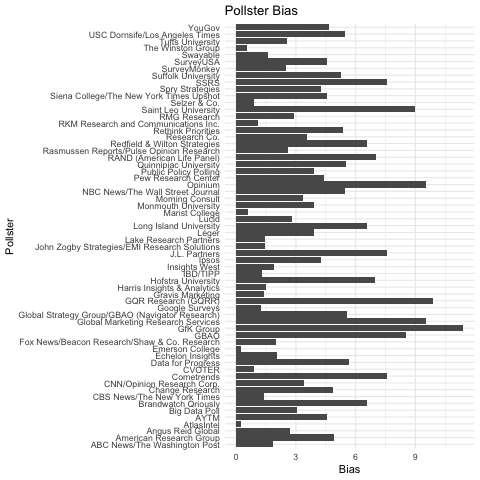

In [21]:
%%R -i df_600

new_df_600 <- df_600 %>% 
    filter(type_simple=='Pres-G') %>%  
    mutate(national = location=="US") %>%  
    filter(national==TRUE) %>% 
    filter(year=='2020' | year=='2016') 

new_df_600 %>%
    group_by(pollster) %>%
    summarise(mean_bias = mean(abs(bias))) %>%
    arrange(desc(mean_bias)) %>%
    ggplot(aes(x = pollster, y = mean_bias)) +
    geom_col() +
    coord_flip() +
    labs(title = "Pollster Bias", x = "Pollster", y = "Bias") +
    theme_minimal()


# Emerson College is the pollster with the least bias among all five pollsters, because it has the lowest average bias from all the polls it has conducted.


👉 Which are the least accurate?

In [17]:
# we think GBAO, GQRR and GfK Group are among the least accurate pollster because they have the highest average bias from all the polls it has conducted. 

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


In [18]:
# we use the average bias of each pollster to rank the pollsters from most reliable to least reliable. 

👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


In [19]:
#1. We only calculated the average bias of the pollsters that had a sample size of 600 or above
#2. We used the average of the bias of each pollster because we think the average bias is more accurate than the bias for each individual poll


👉 In bullet point form, list the **limitations** of your approach 


In [20]:
#1. Jayhawk Consulting only has one poll that met our standard of having a sample size of 600 or above, so we have limited information to make a conclusion about Jayhawk Consulting, though the data we have is probably enough to indicate Jayhawk Consulting	is not a reliable pollster.

#2. We didn't make a plot to see the distribution of the bias of each pollster because we think the average bias is more accurate than the bias for each individual poll.

#3. We didn't study on the bias change of one specific pollster over time, because some pollers might have improve their methodology over time.